# IL2233 Lab 1 - Time series analysis

## Task 1 Exploratory Data Analysis

Task 1.1 White noise series

In [4]:
import matplotlib.pyplot as plt
import time
from random import gauss, seed, randint
from pandas import Series, plotting, read_excel, DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import numpy as np

### 1.1.1

In [142]:
# Line plot, histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs
def plot_all(series: Series):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
    fig.subplots_adjust()

    series.plot(ax=axes[0,0], kind='line', title='Lineplot', xlabel='SV #', ylabel='Value')
    series.plot(ax=axes[0,1], kind='hist', title='Histogram', xlabel='Value', ylabel='frequency')
    series.plot(ax=axes[1,1], kind='density', title='Density', xlabel='', ylabel='density')
    series.plot(ax=axes[1,0], kind='box')
    plotting.lag_plot(series, ax=axes[2,0])
    autocorrelation_plot(series, ax=axes[2,1])
    plot_pacf(series, lags=40, ax=axes[3,0]);

def ljungbox(series: Series):
    return sm.stats.acorr_ljungbox(series)

def adfuller_test(series: Series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'{key}, {value}')

MEAN: -0.07120429237582035
STDDEV: 0.9922827480232803


/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


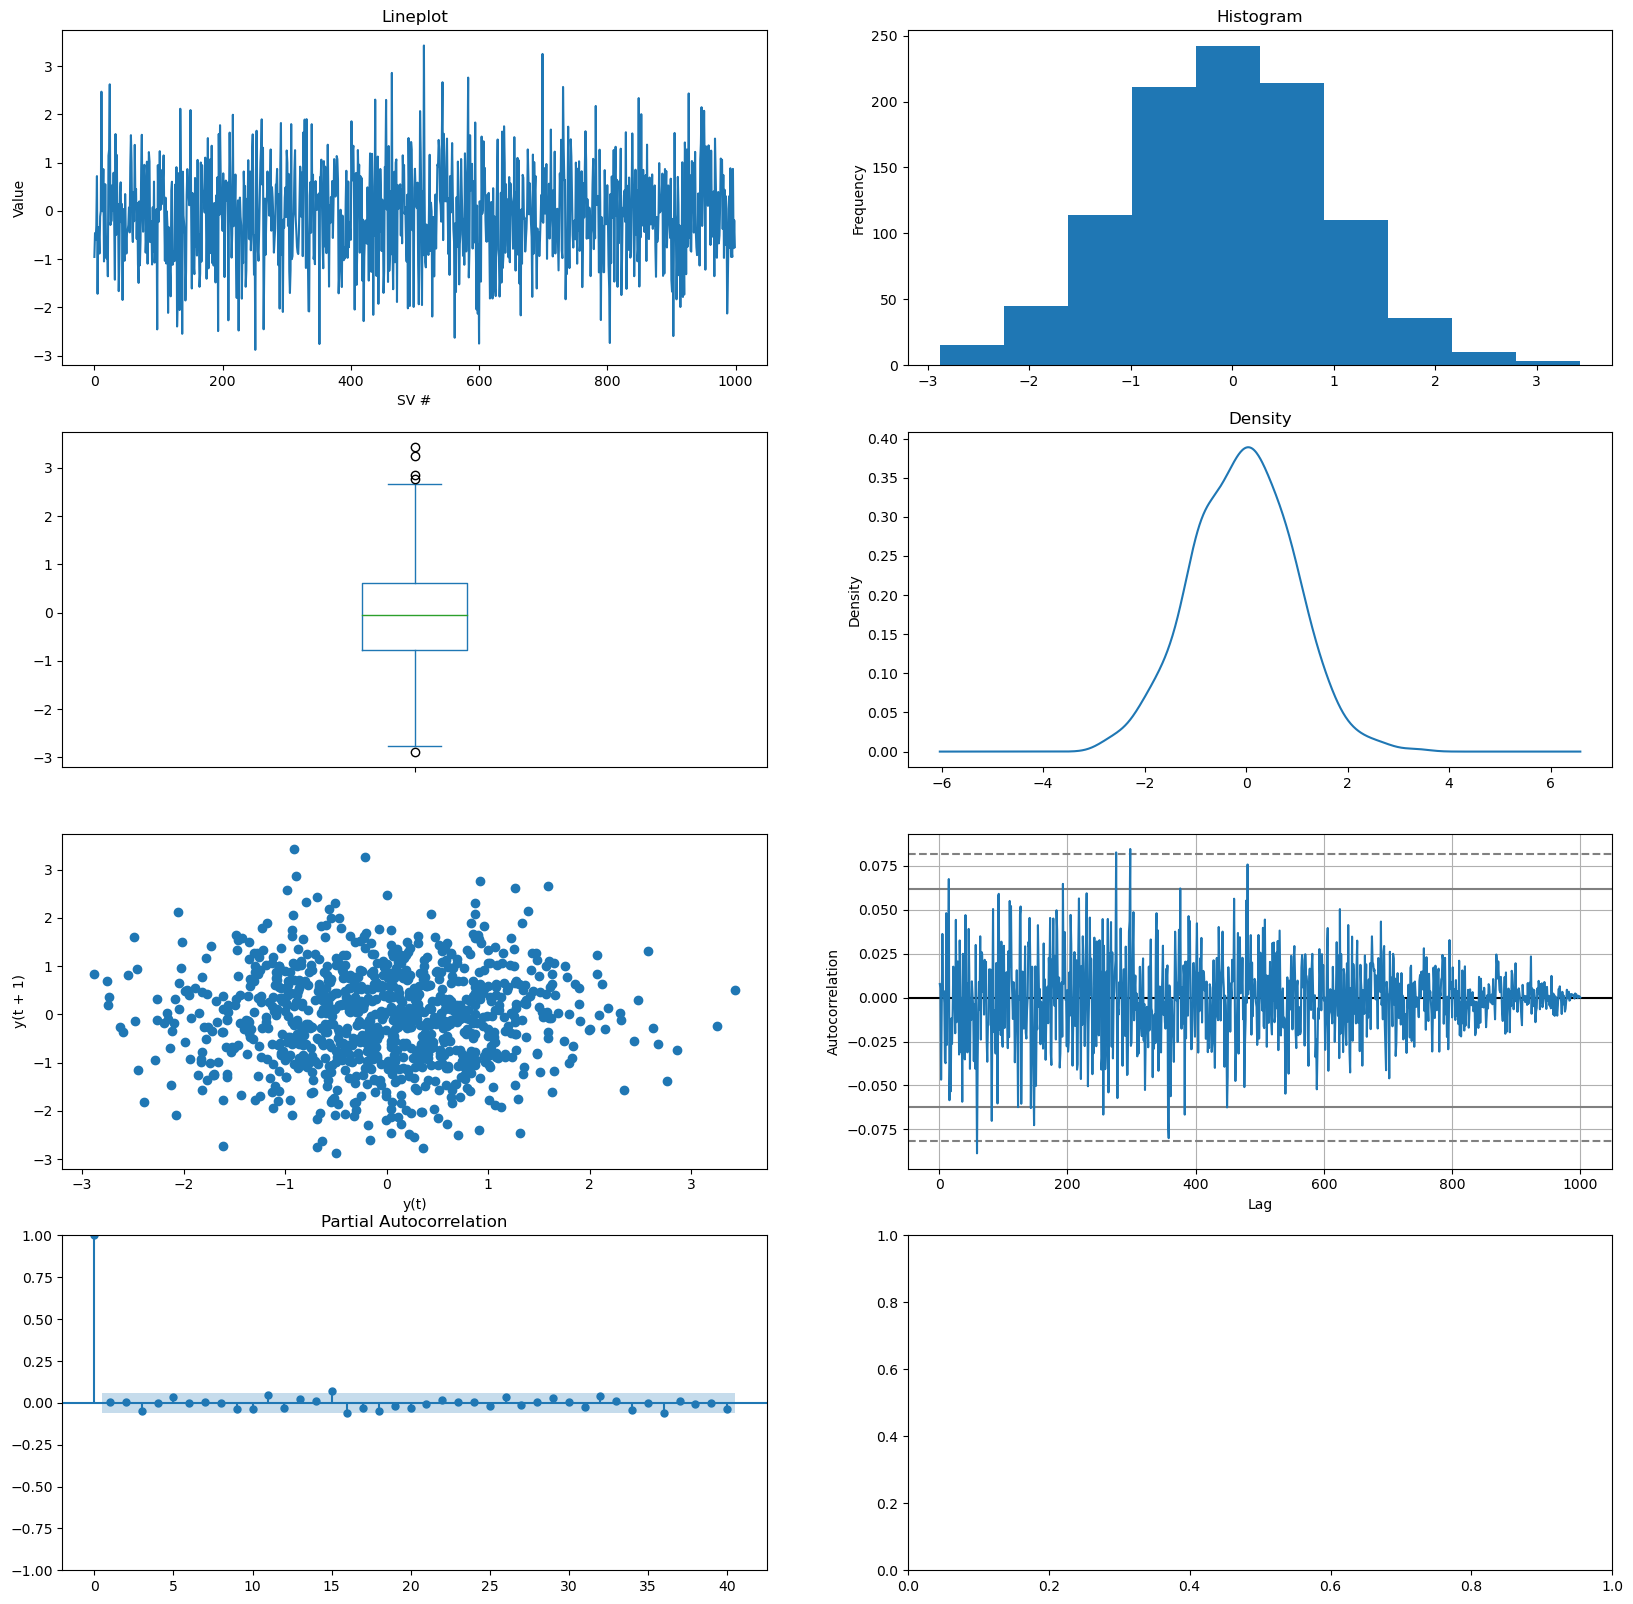

In [143]:
# seed the random number generator
seed(10)
# create white noise series
series = Series([gauss(0.0, 1.0) for _ in range(1000)])
# Mean and standard deviation
print("MEAN:", series.mean())
print("STDDEV:", series.std())
plot_all(series)

### 1.1.2

MEAN: 0.0033041176413629446
STDDEV: 0.09791546516302142


/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


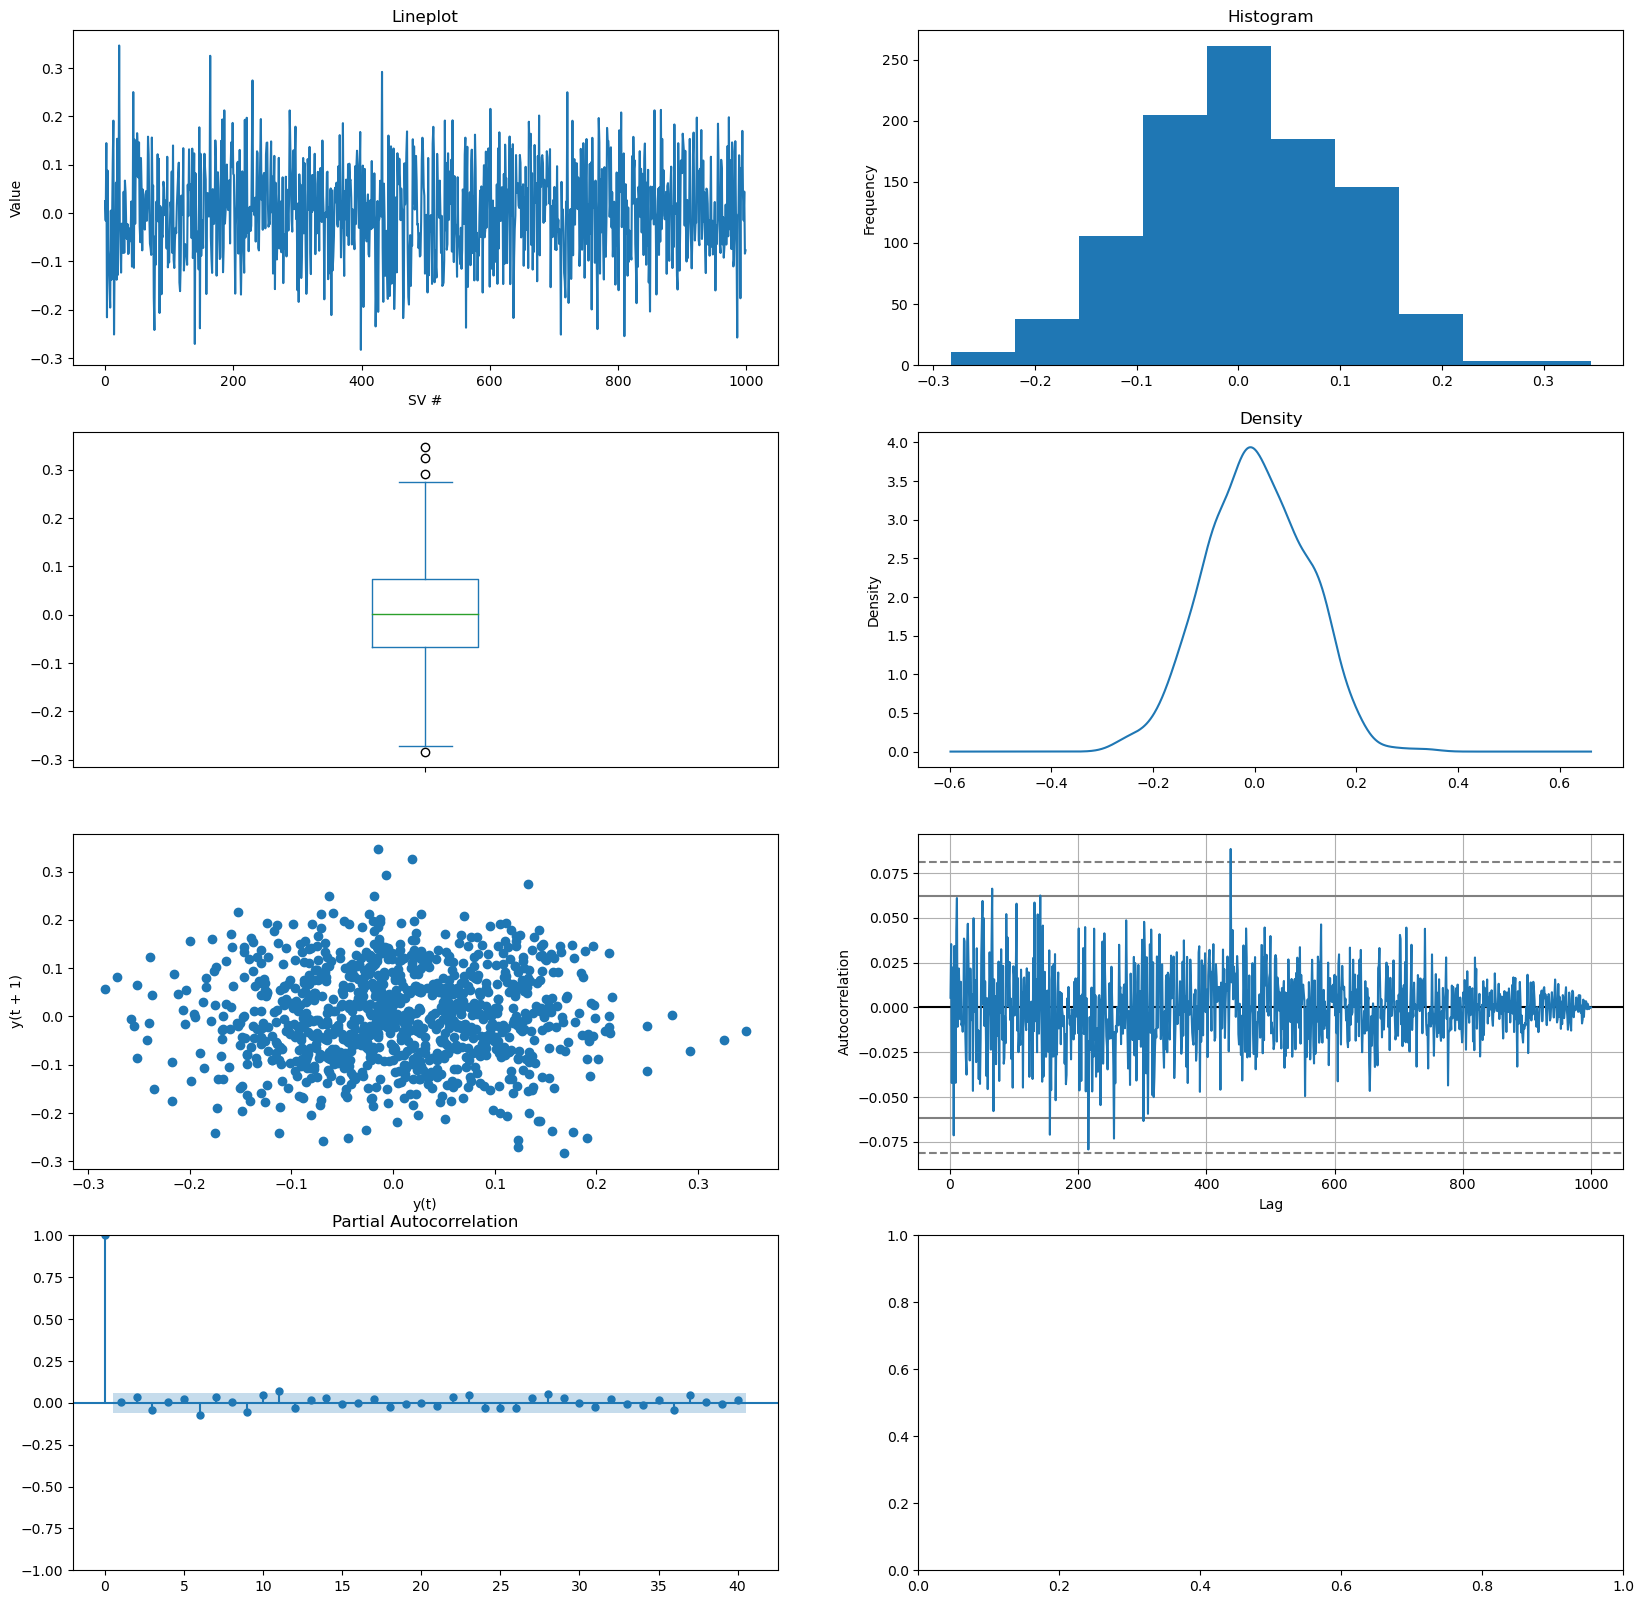

In [144]:
series_100 = [[gauss(0.0, 1.0) for _ in range(1000)] for _ in range(100)]
series_100_avg = []
for i in range(1000):
    sum = 0
    for j in range(100):
        sum += series_100[j][i]
    series_100_avg.append(sum / 100)
series_100_avg = Series(series_100_avg)

# Mean and standard deviation
print("MEAN:", series_100_avg.mean())
print("STDDEV:", series_100_avg.std())
plot_all(series_100_avg)

### 1.1.3

The results below show that the calculated probabilities for the varying lag are set above the threshold of 0.05. It can be observed that the data is randomly distributed.

In [145]:
ljungbox(series_100_avg)

,lb_stat,lb_pvalue
1,0.029767,0.863020
2,1.287263,0.525381
3,3.072530,0.380577
4,3.111408,0.539358
5,3.616514,0.605836
6,8.757487,0.187683
7,9.945298,0.191695
8,9.948899,0.268631
9,11.740194,0.228355
10,13.597836,0.192138


### 1.1.4
For the results below, we find that the ADF statistic is lower than the critical values and that the p-value remains lower than significant value and thus we consider that the data is stationary

In [146]:
adfuller_test(series_100_avg)

ADF Statistic: -9.025475788812402
p-value: 5.6255555472623464e-15
Critial Values:
1%, -3.436979275944879
Critial Values:
5%, -2.8644668170148058
Critial Values:
10%, -2.5683283824496153


## Task 1.2 Random Walk Series

### Task 3.1.2.1 and Task 3.1.2.2 - Realize random walk series and plot the series

/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


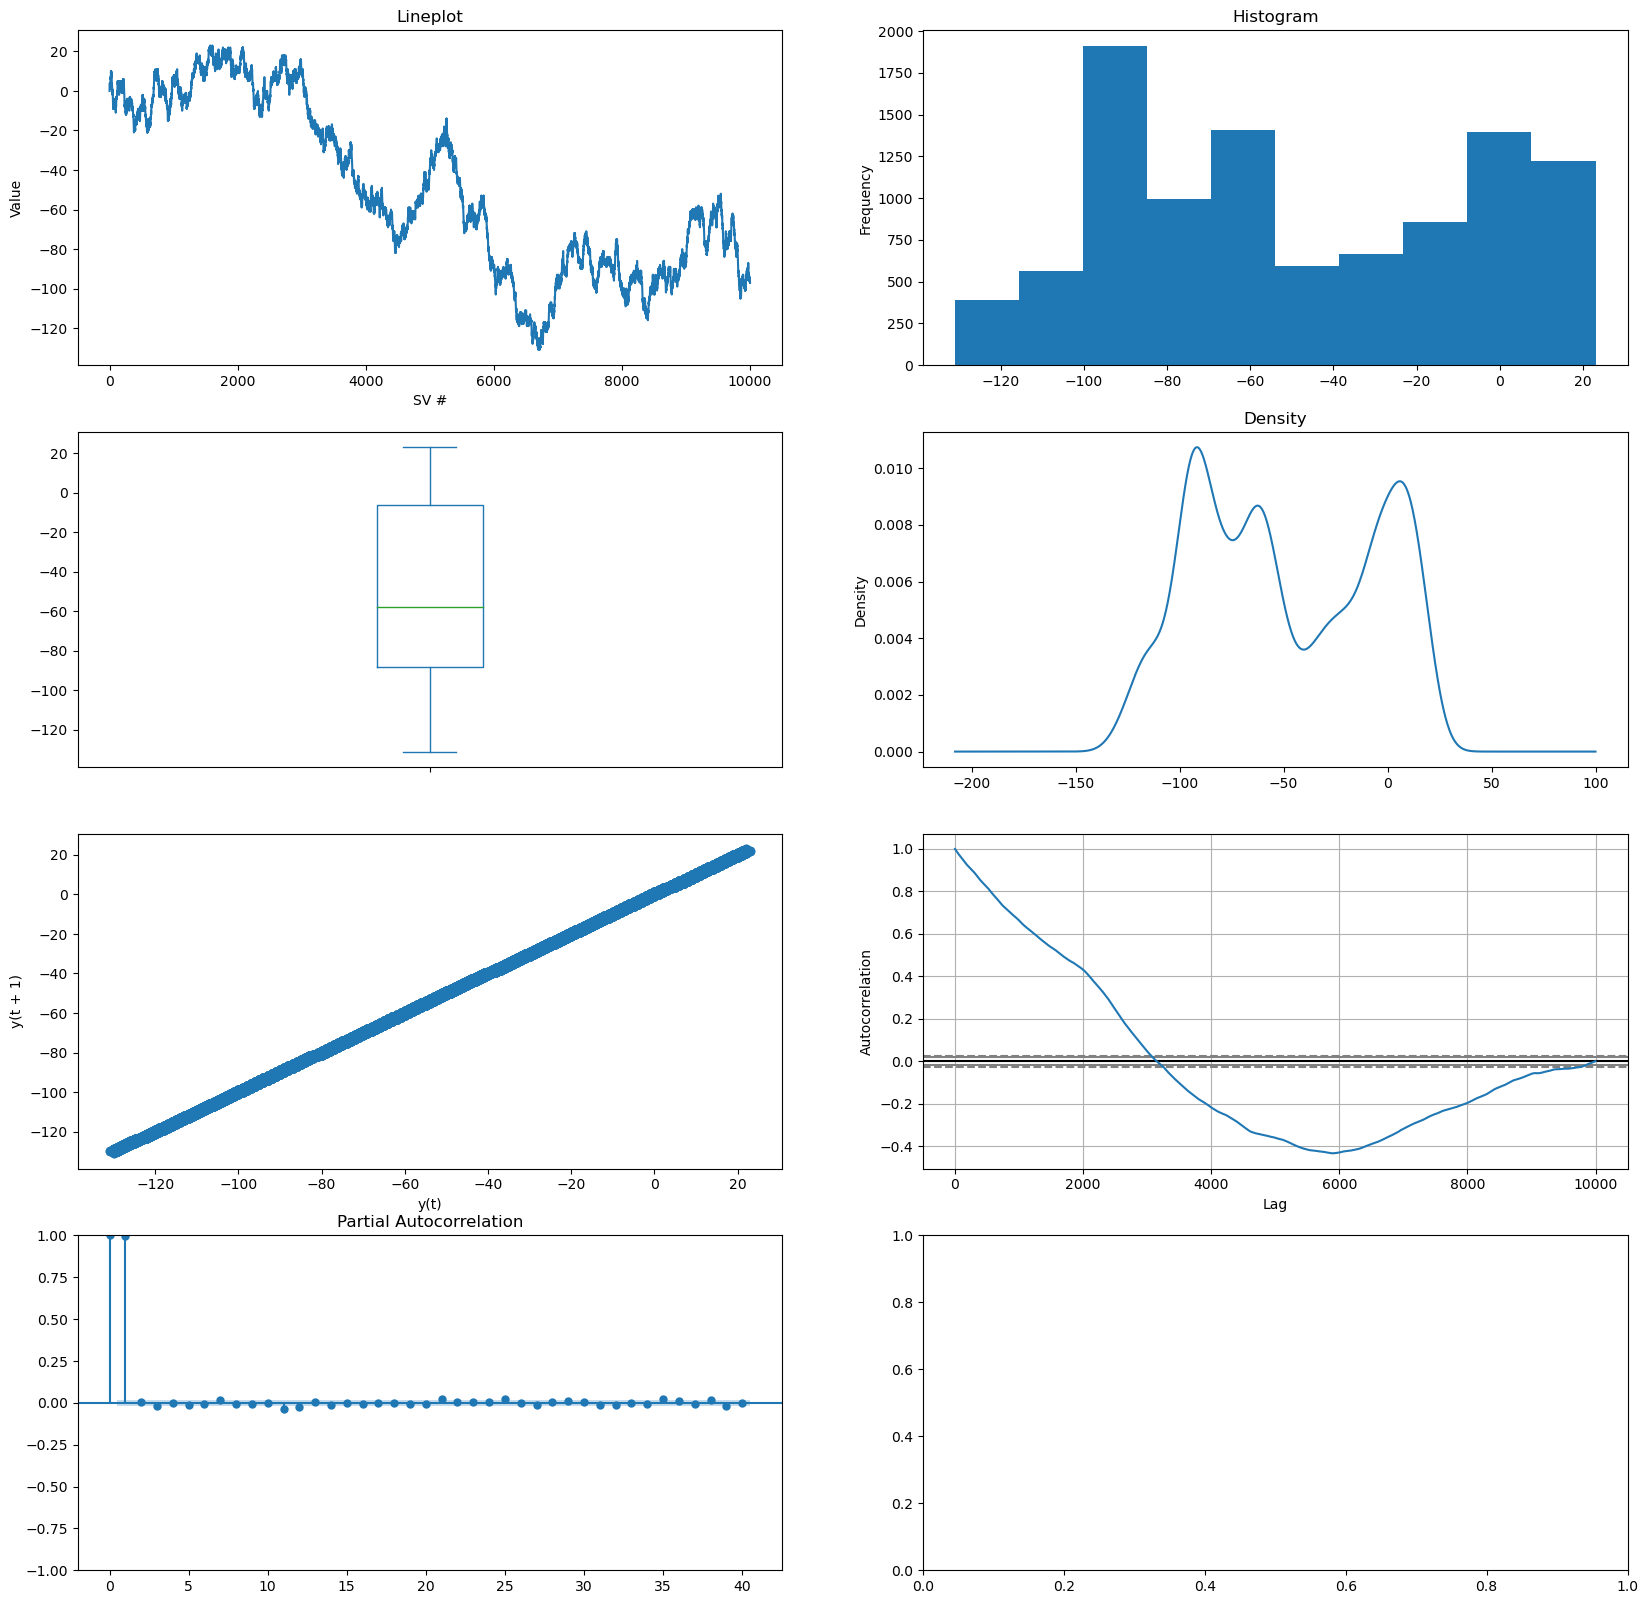

In [147]:
def random_walk(N: int) -> Series:
    series = [0]
    for _ in range(N-1):
        random_val = randint(0,1)
        if random_val == 0:
            random_val = -1
        series.append(series[-1] + random_val)
    
    return Series(series)

seed(time.time())

random_walk_series = random_walk(10000)
plot_all(random_walk_series)

### Task 3.1.2.4 - Ljung Box Test

We see from the Ljungbox test that the series is dependent. This makes sense since the random walk series IS dependent and NOT random

In [148]:
sm.stats.acorr_ljungbox(random_walk_series)

,lb_stat,lb_pvalue
1,9994.894444,0.0
2,19982.784738,0.0
3,29963.447966,0.0
4,39936.871025,0.0
5,49902.916424,0.0
6,59861.546218,0.0
7,69812.991310,0.0
8,79757.165268,0.0
9,89693.998974,0.0
10,99623.479436,0.0


### Task 3.2.1.4 - Stationarity Test with ADF

 The ADF shows that the series is NOT stationary through the test statistics and the p-value. One possibility to make it stationary is to create a new series `z_t = y_t - y_t-1`, which would give constant mean and constant variaton which leads to stationary distribution.

In [149]:
adfuller_test(random_walk_series)

ADF Statistic: -1.3251155078508967
p-value: 0.6176050571344998
Critial Values:
1%, -3.4310048840021
Critial Values:
5%, -2.861829419734687
Critial Values:
10%, -2.5669240529873334


### 3.1.2 - Additional Questions
- What methods can be used to check if a series is random? Describe both visualiza- tion and statistic test methods.

- What methods can be used to check if a series is stationary? Describe both visual- ization and statistic test methods.

- Why is white noise important for time-series prediction?

- What is the difference between a white noise series and a random walk series?

- Is it possible to change a random walk series into a series without correlation across its values ? If so, how? Explain also why it can.


## Task 3.1.3 - Global land temperature anomalies series

### Task 3.1.3.1 and Task 3.1.3.2 - Read data and Plotting etc.

In [150]:
temp_anomalies: DataFrame = read_excel('global_land_temp_anomalies.xlsx', sheet_name=1, names=[None, "Year", "Anomaly"], usecols="B:C", skiprows=4)

/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


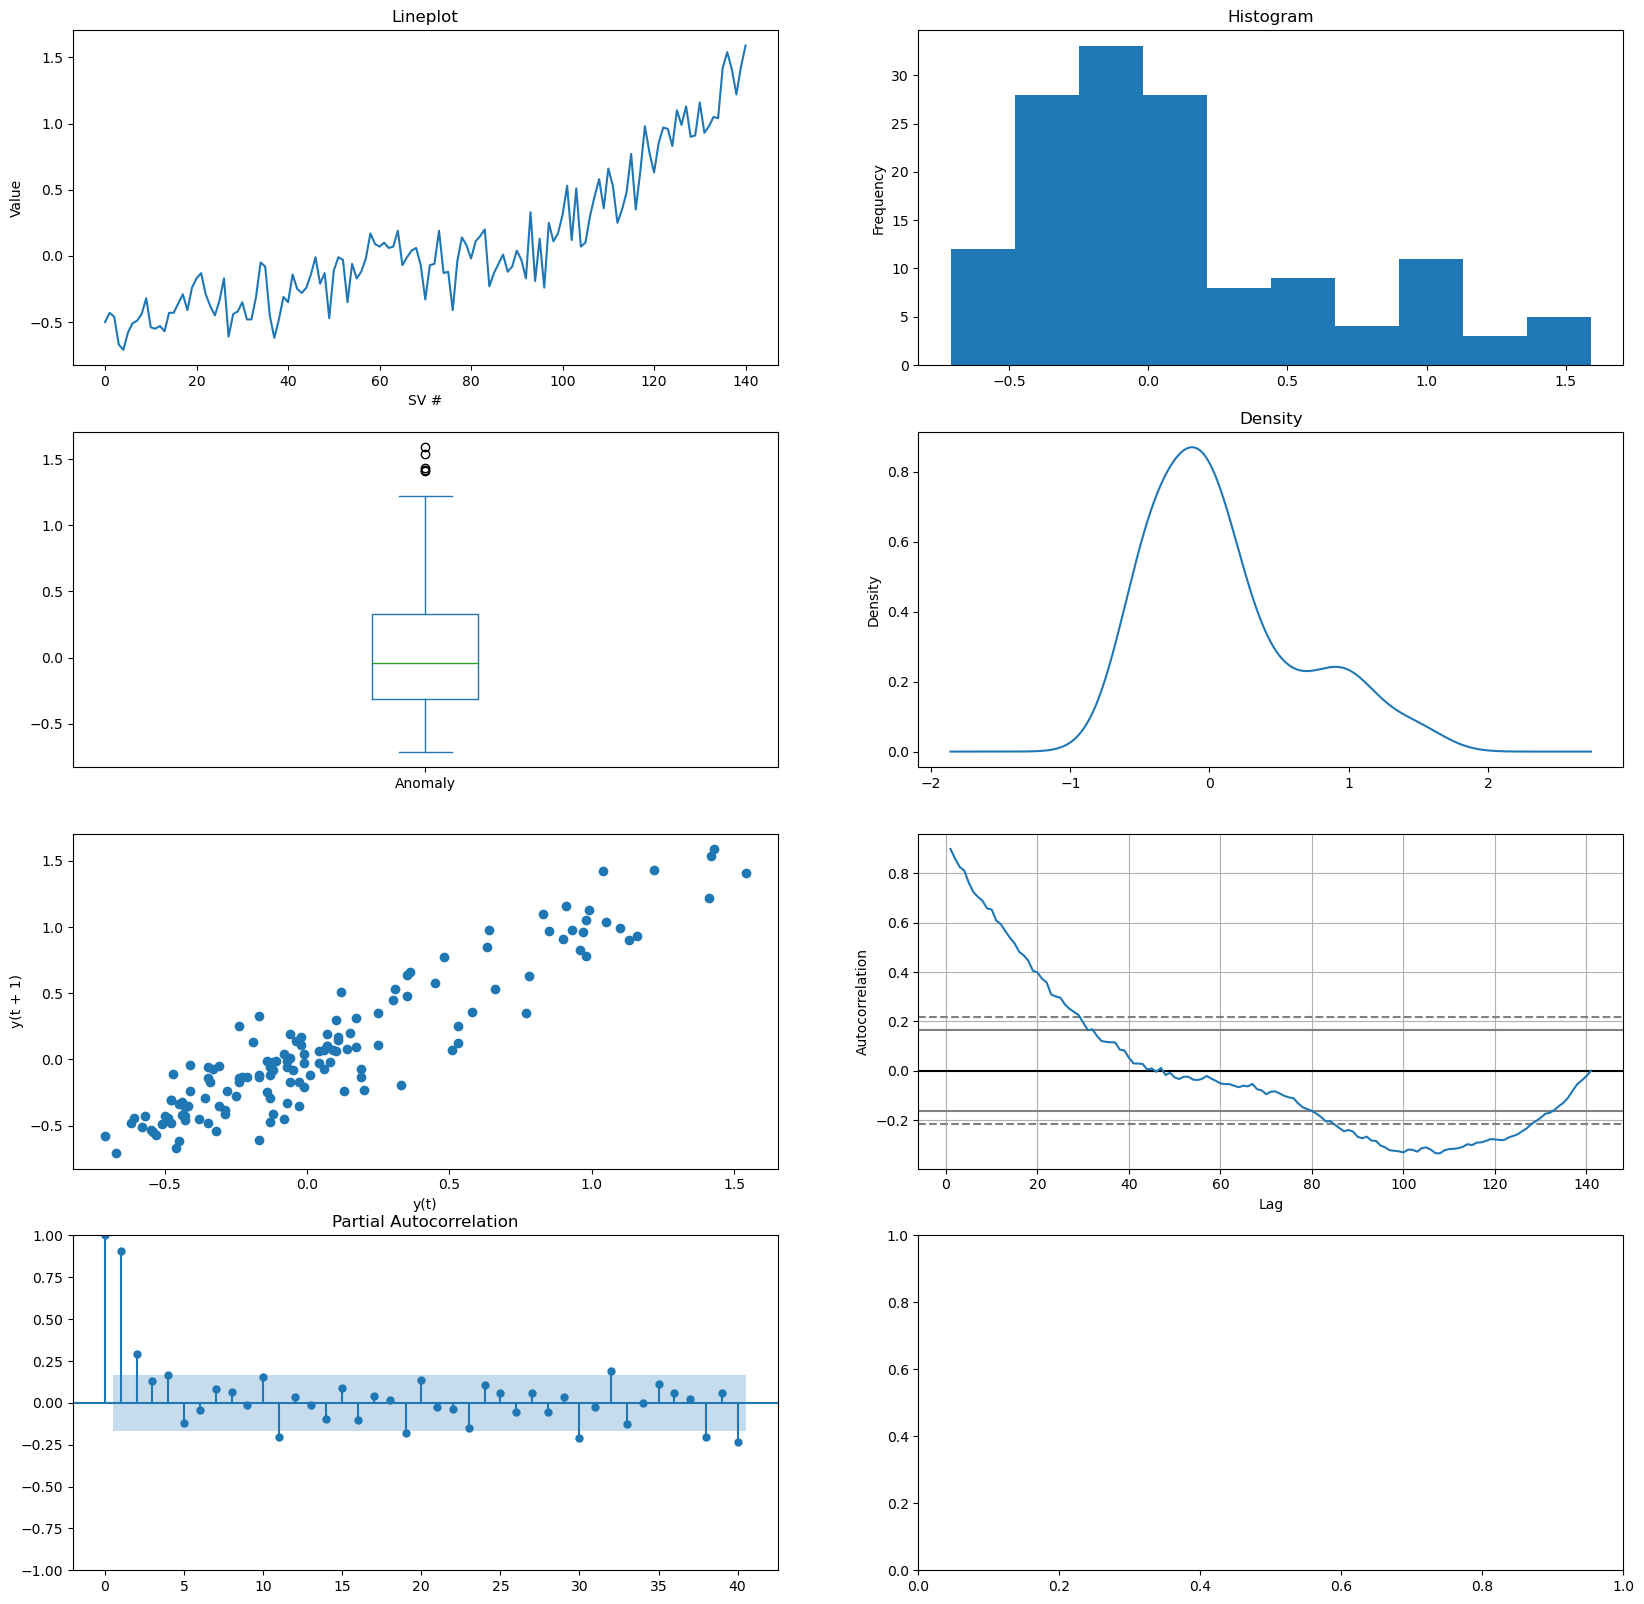

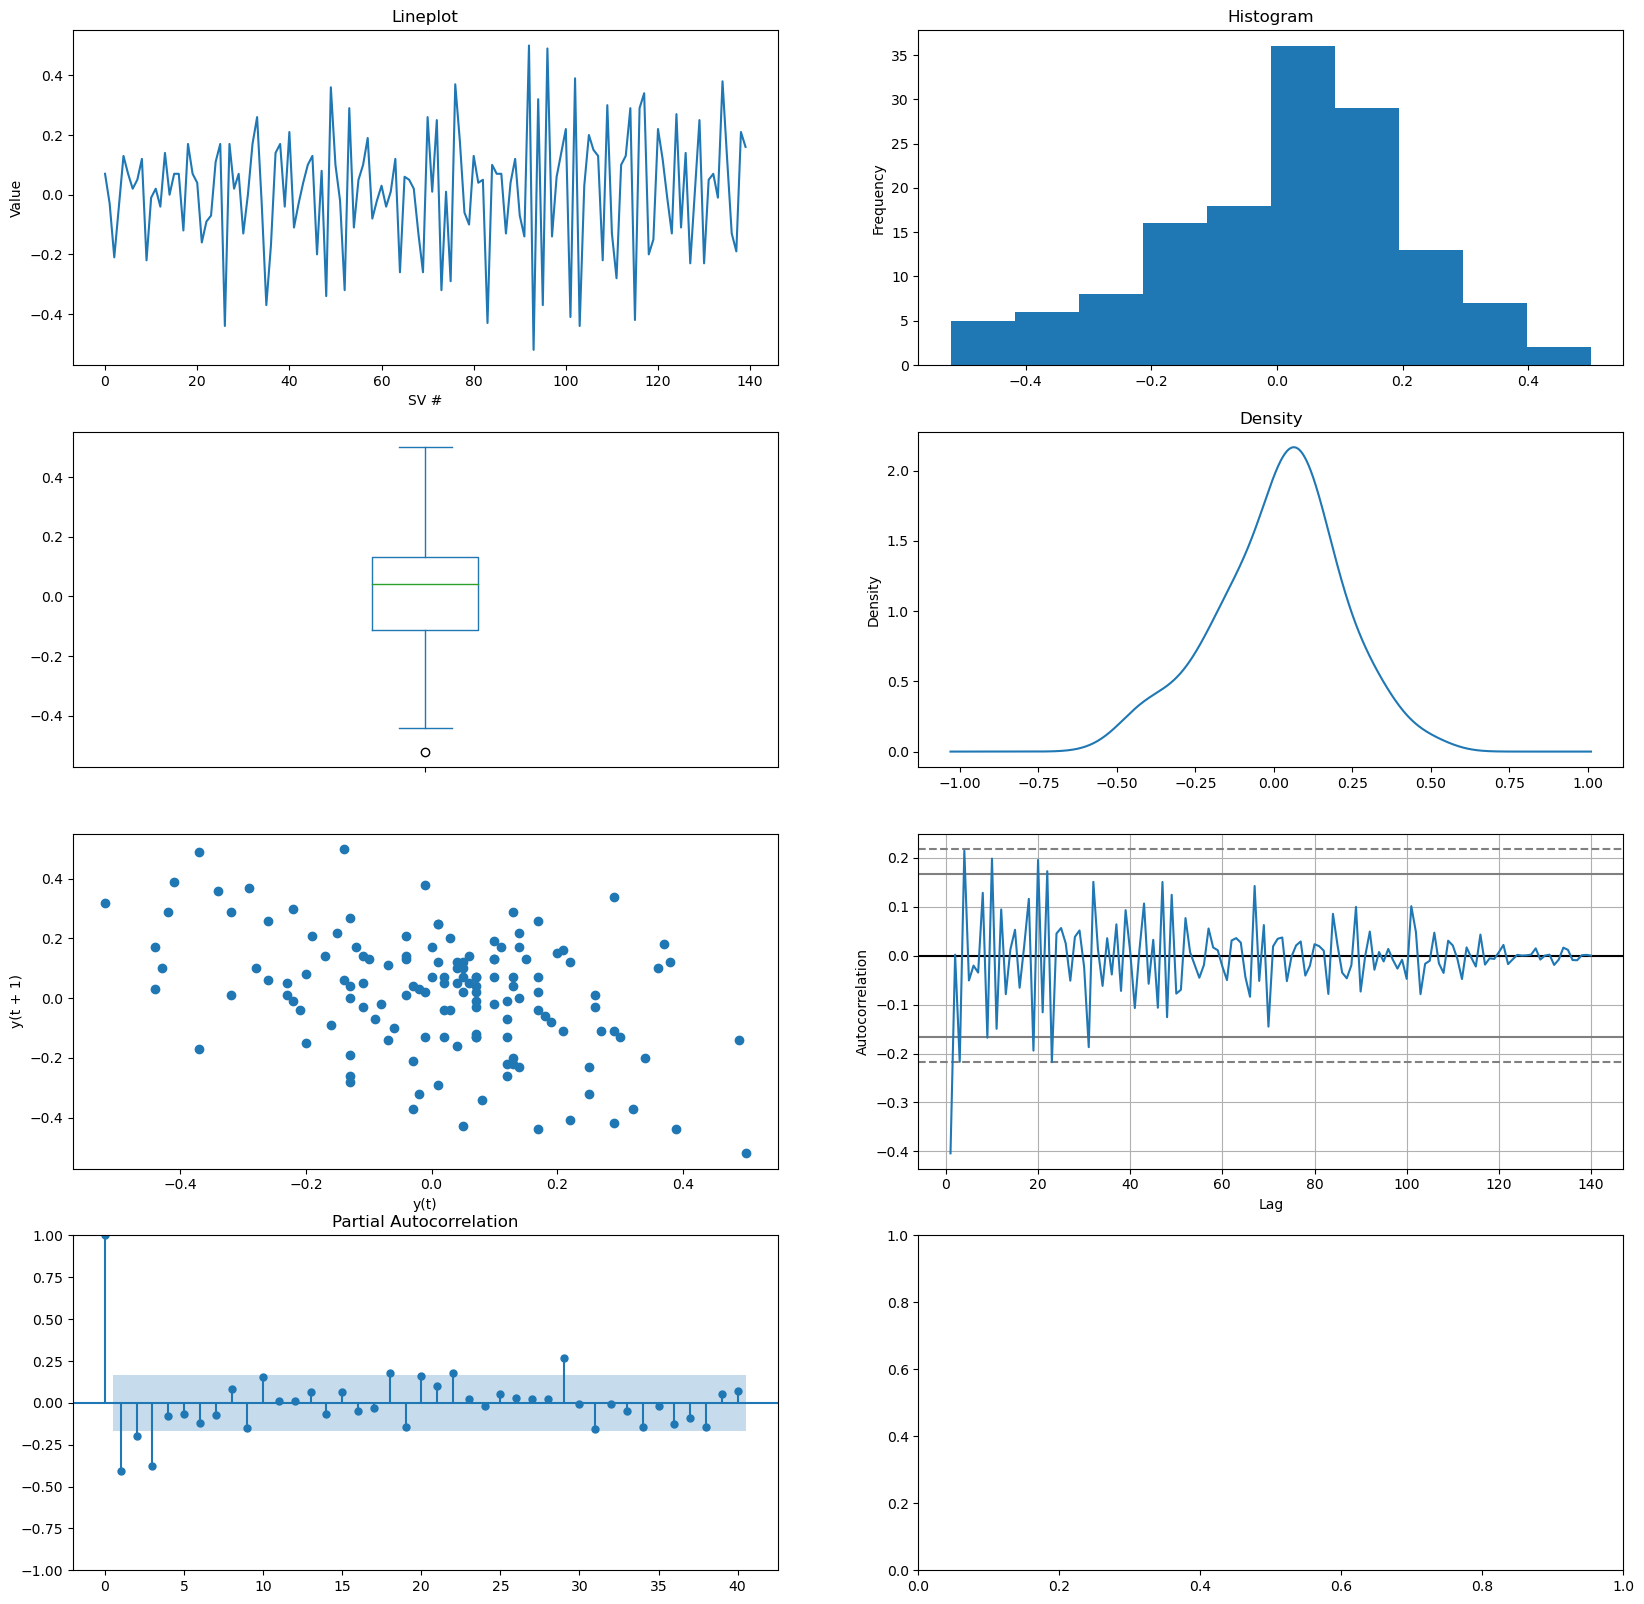

In [151]:
anomalies_series = Series(temp_anomalies['Anomaly'].squeeze())
fod_series = Series([anomalies_series[i] - anomalies_series[i-1] for i in range(1, len(anomalies_series))])
plot_all(anomalies_series)
plot_all(fod_series)

### Task 3.1.3.3 - Test if the first order difference series is random or not

In [152]:
ljungbox(anomalies_series)

,lb_stat,lb_pvalue
1,116.259661,4.169678e-27
2,223.253408,3.320002e-49
3,322.867467,1.116892e-69
4,419.782964,1.476885e-89
5,505.753172,4.575034e-107
6,584.065601,6.376375e-123
7,658.670577,5.588820e-138
8,730.484090,1.952353e-152
9,796.520600,1.192652e-165
10,862.145059,8.904478e-179


In [153]:
ljungbox(fod_series)

,lb_stat,lb_pvalue
1,23.320097,1.371594e-06
2,23.320603,8.629695e-06
3,30.150398,1.283094e-06
4,36.849474,1.934610e-07
5,37.229219,5.388000e-07
6,37.291533,1.544821e-06
7,37.471550,3.817995e-06
8,39.943228,3.282680e-06
9,44.211360,1.290320e-06
10,50.208598,2.443360e-07


### Task 3.1.3.4 - ADF Test to check if original and differenced series are stationary or not

In [154]:
adfuller_test(anomalies_series)

ADF Statistic: 0.938292641937885
p-value: 0.993570249862259
Critial Values:
1%, -3.479007355368944
Critial Values:
5%, -2.8828782366015093
Critial Values:
10%, -2.5781488587564603


It can be observed that the original temperature anomaly serires is not stationary because all critical values are below the ADF statistic.

In [155]:
adfuller_test(fod_series)

ADF Statistic: -12.165503286659847
p-value: 1.460486937213061e-22
Critial Values:
1%, -3.479007355368944
Critial Values:
5%, -2.8828782366015093
Critial Values:
10%, -2.5781488587564603


It can be observed that the **first order difference** of the anomalies series makes the distribution stationary, since all critical values are above the ADF statistic.

### Task 3.1.3.5 - Classical decomposition and STL decomposition on the first order difference series

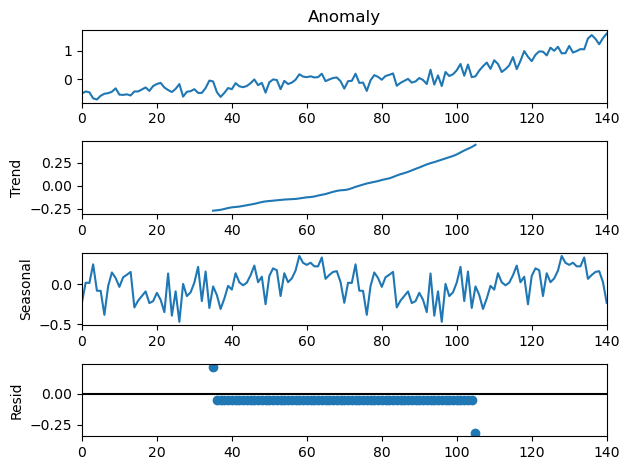

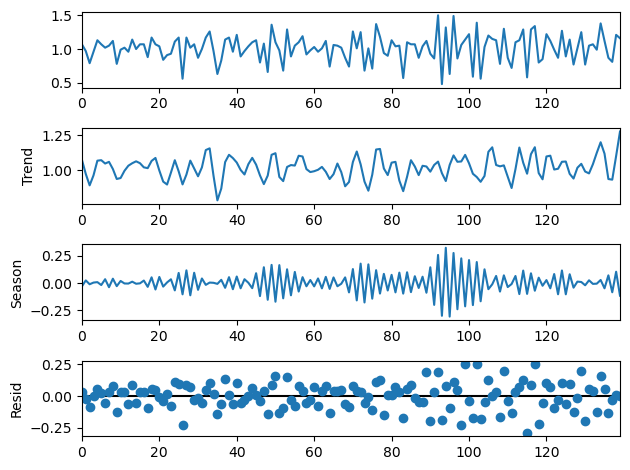

In [196]:
result = seasonal_decompose(fod_series.map(lambda x: x+1), model="additive", period=2) # Not sure of period
result = seasonal_decompose(anomalies_series, model="additive", period=70) # Not sure of period
# result = seasonal_decompose(fod_series.map(lambda x: x+1), model="additive", period=70) # here's a trend
result.plot();
stl_result = STL(fod_series.map(lambda x: x+1), period=2)
stl_result.fit().plot();

### Task 3.1.3 - Questions
- What is a stationary time series?

- If a series is not stationary, is it possible to transform it into a stationary one? If so, give one technique to do it?

- Is the global land temperature anomaly series stationary? Why or why not?

- Is the data set after the first-order difference stationary?

- Why is it useful to decompose a time series into a few components? What are the typical components in a time-series decomposition?


## Task 3.2.2 - Feature Extraction

### Task 3.2.2.1 - Frequency components of a synthetic time-series signal
Data: Generate a series of five sequential sine wave signals for five seconds, each sine
wave lasting 1 second. The nth sine wave signal xn = sin(2π · n · f ), where f = 10, and
n = 1, 2, 3, 4, 5, i.e., frequency 10Hz, 20Hz, 30Hz, 40Hz and 50Hz. The series is digitalized
with a sampling rate is 200 Hz.



<Axes: >

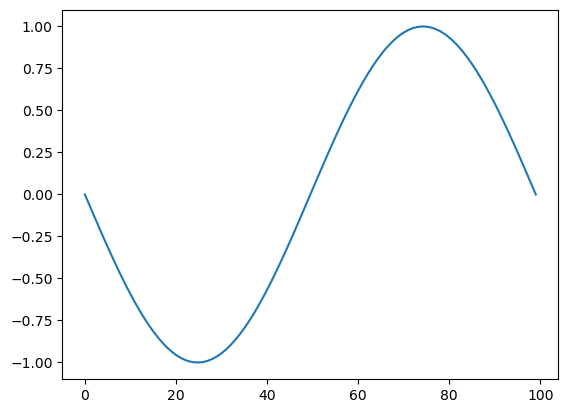

In [22]:
def gen_sine(freq):
    return Series(np.sin(np.linspace(-np.pi, np.pi, 100)))

sine = gen_sine(10)
sine.plot()